In [18]:











































































































































99# the combined dataset of 2012 and 2013 
import pandas as pd
from pickup_utilities import *
df = pd.read_csv("../data/complete.csv")
df['tstamp'] = df.apply(tstampCalc, axis = 1)
df.head()

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
0,0,2012-02-01 00:00:00,2012,2,1,0,0,3.771,0.126,2.798,...,2,4,8,79,5,494,117.266000,0.237381,0.301358,0:00
1,1,2012-02-01 00:30:00,2012,2,1,0,30,3.555,0.110,1.809,...,2,4,8,79,5,494,179.440999,0.363241,0.838331,0:30
2,2,2012-02-01 01:00:00,2012,2,1,1,0,3.831,0.068,0.956,...,2,4,8,79,5,494,161.779999,0.327490,0.763164,1:00
3,3,2012-02-01 01:30:00,2012,2,1,1,30,2.852,0.085,0.925,...,2,4,8,79,5,494,144.735001,0.292986,0.704198,1:30
4,4,2012-02-01 02:00:00,2012,2,1,2,0,2.224,0.097,1.071,...,2,4,8,79,5,494,136.147000,0.275601,0.674146,2:00


In [60]:
#Create a dataframe representing energy consumption for February 11th 2012, the day
# of the France vs. England soccer game.

df_France_England = df.loc[df['day']==11].loc[df['month']==6].loc[df['year']==2012]
df_France_England = df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)


,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,480,2012-06-11 00:00:00,2012,6,11,0,0,18.588,0.900,7.647,...,76,50,67,554,19,3131,409.232001,0.130703,0.165778,0:00
0:30,481,2012-06-11 00:30:00,2012,6,11,0,30,17.902,0.955,6.729,...,76,50,68,554,19,3133,438.163000,0.139854,0.236837,0:30
1:00,482,2012-06-11 01:00:00,2012,6,11,1,0,15.728,0.820,6.185,...,76,50,68,554,19,3133,390.445000,0.124623,0.211583,1:00
1:30,483,2012-06-11 01:30:00,2012,6,11,1,30,14.672,0.925,5.779,...,76,50,68,554,19,3133,354.512000,0.113154,0.180949,1:30
2:00,484,2012-06-11 02:00:00,2012,6,11,2,0,13.951,0.791,5.446,...,76,50,68,554,19,3133,329.545000,0.105185,0.162444,2:00


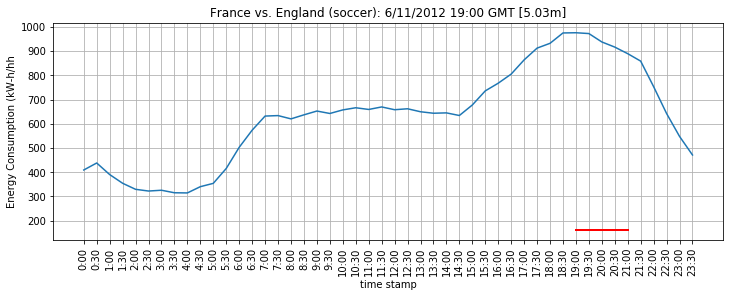

In [61]:
#mport matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_France_England["tstamp"],df_France_England["sigma"])
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [62]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_France_England["A_sigma"] + df_France_England["B_sigma"] + df_France_England["C_sigma"]
Acorn2  = df_France_England["D_sigma"] + df_France_England["E_sigma"]
Acorn3  = df_France_England["F_sigma"] + df_France_England["G_sigma"] + df_France_England["H_sigma"] \
                                           + df_France_England["I_sigma"] + df_France_England["J_sigma"]
Acorn4  = df_France_England["K_sigma"] + df_France_England["L_sigma"] + df_France_England["M_sigma"] \
                                           + df_France_England["N_sigma"]
Acorn5  = df_France_England["O_sigma"] + df_France_England["P_sigma"] + df_France_England["Q_sigma"]

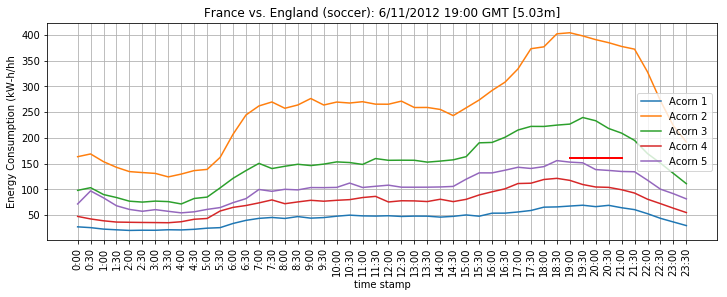

In [63]:
#Plot the day's energy consumption for each Acorn group using a multiline plot
plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [64]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

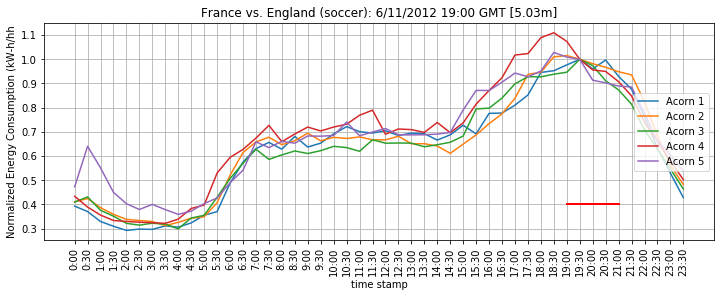

In [65]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [66]:
#Create a dataframe representing energy consumption for February 11th 2012, the day
# of the France vs. Ukraine soccer game.
df_England_Ukraine = df.loc[df['day']==19].loc[df['month']==6].loc[df['year']==2012]
df_England_Ukraine = df_England_Ukraine.set_index(df_England_Ukraine["tstamp"])
df_England_Ukraine.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,864,2012-06-19 00:00:00,2012,6,19,0,0,17.486,1.132,7.899,...,80,54,71,583,22,3296,415.082,0.125935,0.153032,0:00
0:30,865,2012-06-19 00:30:00,2012,6,19,0,30,15.832,1.077,7.120,...,80,54,71,585,22,3298,437.662,0.132705,0.224431,0:30
1:00,866,2012-06-19 01:00:00,2012,6,19,1,0,14.776,0.921,6.385,...,80,54,71,585,22,3298,400.642,0.121480,0.204211,1:00
1:30,867,2012-06-19 01:30:00,2012,6,19,1,30,14.648,0.868,6.188,...,80,54,71,585,22,3296,360.075,0.109246,0.169736,1:30
2:00,868,2012-06-19 02:00:00,2012,6,19,2,0,13.376,0.960,6.187,...,80,54,71,585,22,3296,333.720,0.101250,0.156718,2:00


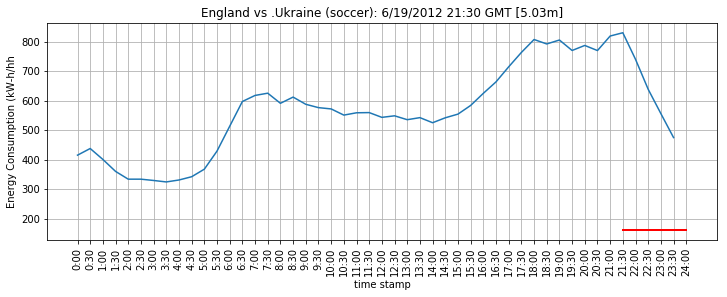

In [67]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_England_Ukraine["tstamp"],df_England_Ukraine["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs .Ukraine (soccer): 6/19/2012 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [68]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_England_Ukraine["A_sigma"] + df_England_Ukraine["B_sigma"] + df_England_Ukraine["C_sigma"]
Acorn2  = df_England_Ukraine["D_sigma"] + df_England_Ukraine["E_sigma"]
Acorn3  = df_England_Ukraine["F_sigma"] + df_England_Ukraine["G_sigma"] + df_England_Ukraine["H_sigma"] \
                                           + df_England_Ukraine["I_sigma"] + df_England_Ukraine["J_sigma"]
Acorn4  = df_England_Ukraine["K_sigma"] + df_England_Ukraine["L_sigma"] + df_England_Ukraine["M_sigma"] \
                                           + df_England_Ukraine["N_sigma"]
Acorn5  = df_England_Ukraine["O_sigma"] + df_England_Ukraine["P_sigma"] + df_England_Ukraine["Q_sigma"]

In [1]:
#Plot the day's energy consumption for each Acorn group using a multiline plot
plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Ukraine["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Ukraine["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Ukraine["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Ukraine["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Ukraine["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. Ukraine (soccer): 6/19/2012 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

NameError: name 'plt' is not defined

In [70]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

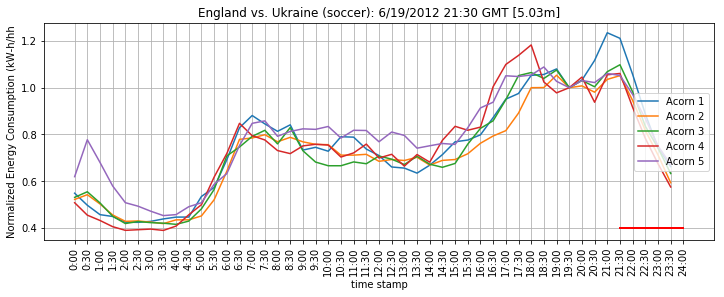

In [71]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Ukraine["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Ukraine["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Ukraine["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Ukraine["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Ukraine["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. Ukraine (soccer): 6/19/2012 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()